ARI for k=3: 0.701


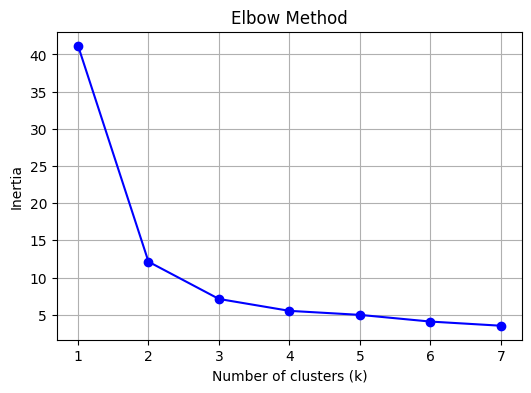

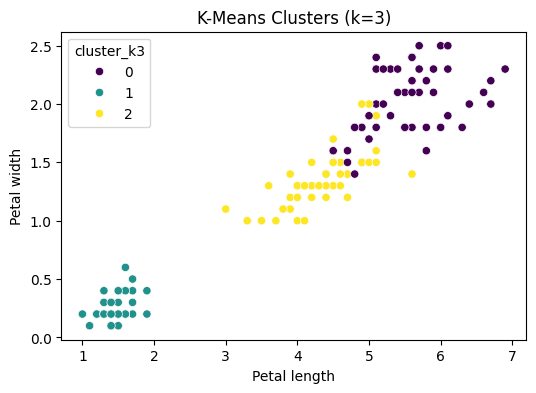

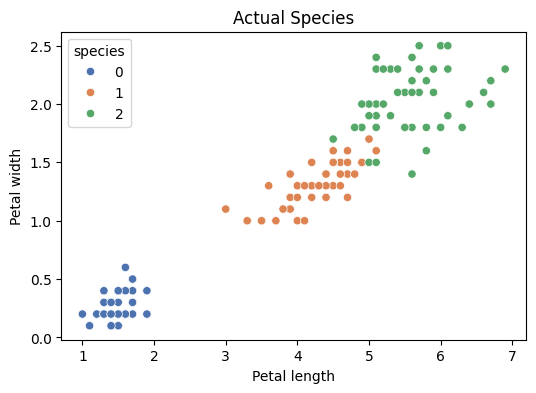

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

# 1. Load and preprocess
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = iris.target

# Normalize features
scaler = MinMaxScaler()
features_scaled = scaler.fit_transform(df.iloc[:, :-1])

# 2. K-Means clustering (k=3)
kmeans3 = KMeans(n_clusters=3, random_state=42)
df['cluster_k3'] = kmeans3.fit_predict(features_scaled)

# Compare clusters with actual classes
ari_k3 = adjusted_rand_score(df['species'], df['cluster_k3'])
print(f"ARI for k=3: {ari_k3:.3f}")

# 3. Elbow curve
inertia = []
K_range = range(1, 8)
for k in K_range:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(features_scaled)
    inertia.append(km.inertia_)

plt.figure(figsize=(6, 4))
plt.plot(K_range, inertia, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.grid(True)
plt.savefig('elbow_curve.png')
plt.show()

# 4. Scatter plot: predicted clusters
plt.figure(figsize=(6, 4))
sns.scatterplot(
    x=df.iloc[:, 2],  # petal length
    y=df.iloc[:, 3],  # petal width
    hue=df['cluster_k3'],
    palette='viridis'
)
plt.xlabel('Petal length')
plt.ylabel('Petal width')
plt.title('K-Means Clusters (k=3)')
plt.savefig('clusters_k3.png')
plt.show()

# 5. Scatter plot: actual species
plt.figure(figsize=(6, 4))
sns.scatterplot(
    x=df.iloc[:, 2],
    y=df.iloc[:, 3],
    hue=df['species'],
    palette='deep'
)
plt.xlabel('Petal length')
plt.ylabel('Petal width')
plt.title('Actual Species')
plt.savefig('actual_species.png')
plt.show()
